In [72]:
## Classifications

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, relu, sigmoid, linear, tanh, Tanh
from gympy.networks import NeuralNetwork
from gympy.optimizers import GradientDescent
import seaborn as sns

<AxesSubplot:xlabel='f1', ylabel='f2'>

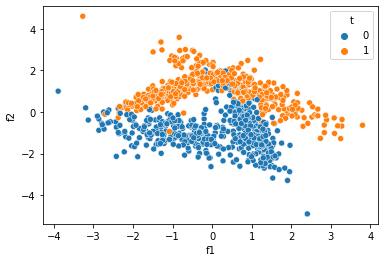

In [74]:

x, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    #random_state=2107
)
df = pd.DataFrame(x, columns=['f1','f2'])
df['t'] = y
sns.scatterplot(data=df, x='f1',y='f2', hue='t')

In [75]:
model = NeuralNetwork(
    layers = [
        Sigmoid(n_input=2, n_output=1)
    ],
    optimizer = GradientDescent(learning_rate=1e-2),
    n_iter=1000
)

In [76]:
X = x.T
Y = y.reshape(1,-1)

<AxesSubplot:xlabel='f1', ylabel='f2'>

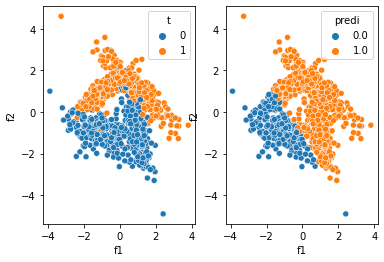

In [77]:
probi = model.forward(X)
predi = np.zeros((1,1000))
predi[probi>0.5] = 1
df['predi'] = predi.flatten()

fig, ax = plt.subplots(1,2)

sns.scatterplot(data=df, x='f1',y='f2', hue='t', ax=ax[0])
sns.scatterplot(data=df, x='f1',y='f2', hue='predi', ax=ax[1])

In [78]:
model.train(X, Y)

0 cost 0.6909335330276906
100 cost 0.32554615168533035
200 cost 0.26870074086363027
300 cost 0.25966273486325925
400 cost 0.2632052114097715
500 cost 0.2697233614469502
600 cost 0.27545425790895695
700 cost 0.27946330259399094
800 cost 0.2819689839016745
900 cost 0.28344123979352254


In [79]:
prob = model.forward(X)
pred = np.zeros((1,1000))

pred[prob>0.5] = 1

df['pred'] = pred.flatten()
df.head()

,f1,f2,t,predi,pred
0,-0.835708,-1.018801,0,0.0,0.0
1,-1.058963,0.918989,1,1.0,1.0
2,-0.920988,1.050259,1,1.0,1.0
3,-0.155558,-1.851559,0,0.0,0.0
4,2.467172,0.436639,1,1.0,1.0


<AxesSubplot:xlabel='f1', ylabel='f2'>

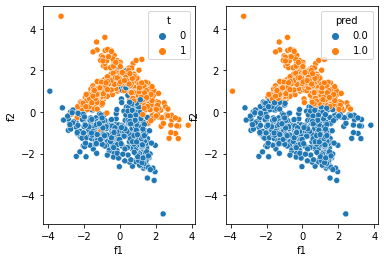

In [80]:
fig, ax = plt.subplots(1,2)

sns.scatterplot(data=df, x='f1',y='f2', hue='t', ax=ax[0])
sns.scatterplot(data=df, x='f1',y='f2', hue='pred', ax=ax[1])

In [84]:
x_ = np.array([[0],[4]])

In [85]:
model.forward(x_)

array([[0.99997717]])